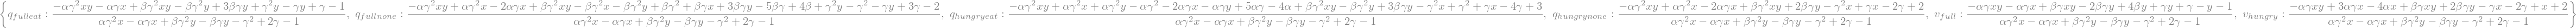

In [3]:
# 2-1
# 求解示例Bellman期望方程

import sympy
from sympy import symbols

sympy.init_printing()
v_hungry, v_full = symbols("v_hungry v_full")
q_hungry_eat, q_hungry_none, q_full_eat, q_full_none = symbols("q_hungry_eat q_hungry_none q_full_eat q_full_none")
alpha, beta, x, y, gamma = symbols("alpha beta x y gamma")
system = sympy.Matrix(
    (
        (1, 0, x - 1, -x, 0, 0, 0),
        (0, 1, 0, 0, -y, y - 1, 0),
        (-gamma, 0, 1, 0, 0, 0, - 2),
        ((alpha - 1) * gamma, -alpha * gamma, 0, 1, 0, 0, 4 * alpha - 3),
        (-beta * gamma, (beta - 1) * gamma, 0, 0, 1, 0, -4 * beta + 2),
        (0, -gamma, 0, 0, 0, 1, 1),
    )
)

sympy.solve_linear_system(system, v_hungry, v_full, q_hungry_none, q_hungry_eat, q_full_none, q_full_eat)


==== v=(饿) = q(饿，不吃), v=(饱) = q(饱，吃) ==== x = 0, y = 0 ====


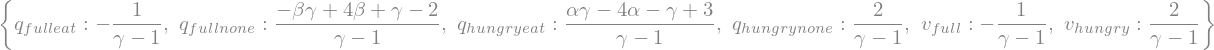

==== v=(饿) = q(饿，吃), v=(饱) = q(饱，吃) ==== x = 1, y = 0 ====


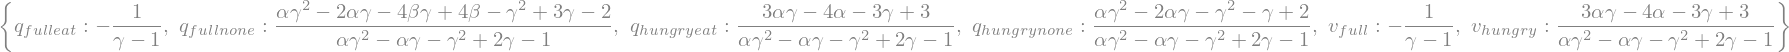

==== v=(饿) = q(饿，不吃), v=(饱) = q(饱，不吃) ==== x = 0, y = 1 ====


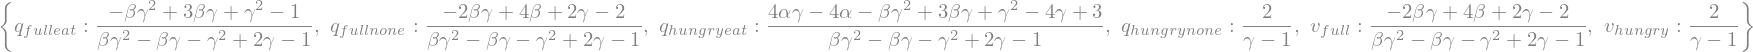

==== v=(饿) = q(饿，吃), v=(饱) = q(饱，不吃) ==== x = 1, y = 1 ====


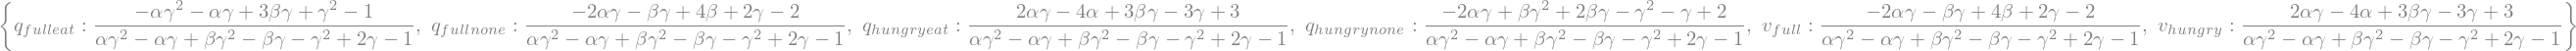

In [1]:
# 2-2
# 求解示例Bellman最优方程

import sympy
from sympy import symbols

sympy.init_printing()
v_hungry, v_full = symbols("v_hungry v_full")
q_hungry_eat, q_hungry_none, q_full_eat, q_full_none = symbols("q_hungry_eat q_hungry_none q_full_eat q_full_none")
alpha, beta, x, y, gamma = symbols("alpha beta x y gamma")
xy_tuples = ((0, 0), (1, 0), (0, 1), (1, 1))
for x, y in xy_tuples:
    system = sympy.Matrix(
        (
            (1, 0, x - 1, -x, 0, 0, 0),
            (0, 1, 0, 0, -y, y - 1, 0),
            (-gamma, 0, 1, 0, 0, 0, - 2),
            ((alpha - 1) * gamma, -alpha * gamma, 0, 1, 0, 0, 4 * alpha - 3),
            (-beta * gamma, (beta - 1) * gamma, 0, 0, 1, 0, -4 * beta + 2),
            (0, -gamma, 0, 0, 0, 1, 1),
        )
    )

    result = sympy.solve_linear_system(system, v_hungry, v_full, q_hungry_none, q_hungry_eat, q_full_none, q_full_eat)

    msgx = 'v=(饿) = q(饿，{}吃)'.format('' if x else '不')
    msgy = 'v=(饱) = q(饱，{}吃)'.format('不' if y else '')
    print('==== {}, {} ==== x = {}, y = {} ===='.format(msgx, msgy, x, y))
    display(result)

In [2]:
# 导入'CliffWalking-v0'
import gym
env = gym.make('CliffWalking-v0')
print('观测空间 = {}'.format(env.observation_space))
print('动作空间 = {}'.format(env.action_space))
print('状态数量 = {}, 动作数量 = {}'.format(env.nS, env.nA))
print('地图大小 = {}'.format(env.shape))

观测空间 = Discrete(48)
动作空间 = Discrete(4)
状态数量 = 48, 动作数量 = 4
地图大小 = (4, 12)


In [3]:
# 运行一个回合

import numpy as np

def play_once(env, policy):
    total_reward = 0
    state = env.reset()
    while True:
        loc = np.unravel_index(state, env.shape)
        print('状态 = {}, 位置 = {}'.format(state, loc), end=' ')
        action = np.random.choice(env.nA, p=policy[state])
        state, reward, done, _ = env.step(action)
        print('动作 = {}, 奖励 = {}'.format(action, reward))
        total_reward += reward
        if done:
            break
    return total_reward

In [4]:
# 最优策略

actions = np.ones(env.shape, dtype=int)
actions[-1, :] = 0
actions[:, -1] = 2
optimal_policy = np.eye(4)[actions.reshape(-1)]

In [9]:
# 一个回合

total_reward = play_once(env, optimal_policy)
print('总奖励 = {}'.format(total_reward))

状态 = 36, 位置 = (3, 0) 动作 = 0, 奖励 = -1
状态 = 24, 位置 = (2, 0) 动作 = 1, 奖励 = -1
状态 = 25, 位置 = (2, 1) 动作 = 1, 奖励 = -1
状态 = 26, 位置 = (2, 2) 动作 = 1, 奖励 = -1
状态 = 27, 位置 = (2, 3) 动作 = 1, 奖励 = -1
状态 = 28, 位置 = (2, 4) 动作 = 1, 奖励 = -1
状态 = 29, 位置 = (2, 5) 动作 = 1, 奖励 = -1
状态 = 30, 位置 = (2, 6) 动作 = 1, 奖励 = -1
状态 = 31, 位置 = (2, 7) 动作 = 1, 奖励 = -1
状态 = 32, 位置 = (2, 8) 动作 = 1, 奖励 = -1
状态 = 33, 位置 = (2, 9) 动作 = 1, 奖励 = -1
状态 = 34, 位置 = (2, 10) 动作 = 1, 奖励 = -1
状态 = 35, 位置 = (2, 11) 动作 = 2, 奖励 = -1
总奖励 = -13


In [11]:
# 2-6 用Bellman方程求解状态价值和动作价值

def evaluate_bellman(env, policy, gamma=1.):
    a, b = np.eye(env.nS), np.zeros((env.nS))
    for state in range(env.nS - 1):
        for action in range(env.nA):
            pi = policy[state][action]
            for p, next_state, reward, done in env.P[state][action]:
                a[state, next_state] -= [pi * gamma * p]
                b[state] += (pi * reward * p)
    v = np.linalg.solve(a, b)
    q = np.zeros((env.nS, env.nA))
    for state in range(env.nS - 1):
        for action in range(env.nA):
            for p, next_state, reward, done in env.P[state][action]:
                q[state][action] += ((reward + gamma * v[next_state]) * p)
    
    return v, q

In [12]:
# 2-7 评估随机策略

policy = np.random.uniform(size=(env.nS, env.nA))
policy = policy / np.sum(policy, axis=1)[:, np.newaxis]
state_values, action_values = evaluate_bellman(env, policy)
print('状态价值 = {}'.format(state_values))
print('动作价值 = {}'.format(action_values))

状态价值 = [-3134354.09104268 -3134126.96173355 -3133277.26248774 -3132493.11103687
 -3131288.62313683 -3122944.64390446 -3117515.67837201 -3074376.98598297
 -3039198.12095808 -2790250.12025305 -2533046.75701206 -2180896.17008608
 -3134441.23191292 -3134169.42263547 -3134012.02872268 -3132861.6839052
 -3130931.24993232 -3120372.11676639 -3107546.7901031  -3074053.41717956
 -3050374.29654501 -2974574.37072729 -2546968.33673238 -2180468.92549796
 -3134723.97567073 -3134707.65301948 -3134411.08418141 -3133785.68952711
 -3132937.23198471 -3131020.40683327 -3127420.83336839 -3097059.04867485
 -3092883.9142322  -3031894.30753952 -2825381.34561493 -1483672.76025053
 -3134994.20660826 -3135063.79646457 -3134741.76197133 -3134754.23042656
 -3134520.21991202 -3134755.98581698 -3132613.4423758  -3110294.00935083
 -3125865.64190957 -3100587.67967799 -2298719.52029336        0.        ]
动作价值 = [[-3.13435509e+06 -3.13412796e+06 -3.13444223e+06 -3.13435509e+06]
 [-3.13412796e+06 -3.13327826e+06 -3.134170

In [13]:
# 2-8 评估最优策略

optimal_state_values, optimal_action_values = evaluate_bellman(env, optimal_policy)
print('最优状态价值 = {}'.format(optimal_state_values))
print('最优动作价值 = {}'.format(optimal_action_values))

最优状态价值 = [-14. -13. -12. -11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3. -13. -12.
 -11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2. -12. -11. -10.  -9.
  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1. -13. -12. -11. -10.  -9.  -8.
  -7.  -6.  -5.  -4.  -3.   0.]
最优动作价值 = [[ -15.  -14.  -14.  -15.]
 [ -14.  -13.  -13.  -15.]
 [ -13.  -12.  -12.  -14.]
 [ -12.  -11.  -11.  -13.]
 [ -11.  -10.  -10.  -12.]
 [ -10.   -9.   -9.  -11.]
 [  -9.   -8.   -8.  -10.]
 [  -8.   -7.   -7.   -9.]
 [  -7.   -6.   -6.   -8.]
 [  -6.   -5.   -5.   -7.]
 [  -5.   -4.   -4.   -6.]
 [  -4.   -4.   -3.   -5.]
 [ -15.  -13.  -13.  -14.]
 [ -14.  -12.  -12.  -14.]
 [ -13.  -11.  -11.  -13.]
 [ -12.  -10.  -10.  -12.]
 [ -11.   -9.   -9.  -11.]
 [ -10.   -8.   -8.  -10.]
 [  -9.   -7.   -7.   -9.]
 [  -8.   -6.   -6.   -8.]
 [  -7.   -5.   -5.   -7.]
 [  -6.   -4.   -4.   -6.]
 [  -5.   -3.   -3.   -5.]
 [  -4.   -3.   -2.   -4.]
 [ -14.  -12.  -14.  -13.]
 [ -13.  -11. -113.  -13.]
 [ -12.  -10. -113.  -12.]
 [ -11. 

In [15]:
# 2-9 用线性规划求解Bellman最优方程

import scipy

def optimal_bellman(env, gamma=1.):
    p = np.zeros((env.nS, env.nA, env.nS))
    r = np.zeros((env.nS, env.nA))
    for state in range(env.nS - 1):
        for action in range(env.nA):
            for prob, next_state, reward, done in env.P[state][action]:
                p[state, action, next_state] += prob
                r[state, action] += (reward * prob)
    c = np.ones(env.nS)
    a_ub = gamma * p.reshape(-1, env.nS) - np.repeat(np.eye(env.nS), env.nA, axis=0)
    b_ub = -r.reshape(-1)
    a_eq = np.zeros((0, env.nS))
    b_eq = np.zeros(0)
    bounds = [(None, None), ] * env.nS
    res = scipy.optimize.linprog(c, a_ub, b_ub, bounds=bounds, method='interior-point')
    v = res.x
    q = r + gamma * np.dot(p, v)
    return v, q

optimal_state_values, optimal_action_values = optimal_bellman(env)
print('最优状态价值 = {}'.format(optimal_state_values))
print('最优动作价值 = {}'.format(optimal_action_values))

最优状态价值 = [-1.40000000e+01 -1.30000000e+01 -1.20000000e+01 -1.10000000e+01
 -1.00000000e+01 -9.00000000e+00 -8.00000000e+00 -7.00000000e+00
 -6.00000000e+00 -5.00000000e+00 -4.00000000e+00 -3.00000000e+00
 -1.30000000e+01 -1.20000000e+01 -1.10000000e+01 -1.00000000e+01
 -9.00000000e+00 -8.00000000e+00 -7.00000000e+00 -6.00000000e+00
 -5.00000000e+00 -4.00000000e+00 -3.00000000e+00 -2.00000000e+00
 -1.20000000e+01 -1.10000000e+01 -1.00000000e+01 -9.00000000e+00
 -8.00000000e+00 -7.00000000e+00 -6.00000000e+00 -5.00000000e+00
 -4.00000000e+00 -3.00000000e+00 -2.00000000e+00 -1.00000000e+00
 -1.30000000e+01 -1.20000000e+01 -1.10000000e+01 -1.00000000e+01
 -9.00000000e+00 -8.00000000e+00 -7.00000000e+00 -6.00000000e+00
 -5.00000000e+00 -4.00000000e+00 -9.99999999e-01  1.82458938e-11]
最优动作价值 = [[ -14.99999999  -13.99999999  -13.99999999  -14.99999999]
 [ -13.99999999  -13.          -13.          -14.99999999]
 [ -13.          -12.          -12.          -13.99999999]
 [ -12.          -11.   

In [18]:
# 2-10 用最优动作价值确定最优确定策略

optimal_actions = optimal_action_values.argmax(axis=1)
print('最优策略 = {}'.format(optimal_actions))

最优策略 = [2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 0
 0 0 0 0 0 0 0 0 0 1 0]
